In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils


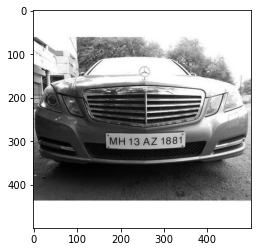

In [2]:
img = cv2.imread('car2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

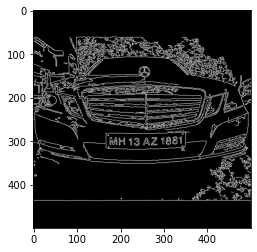

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [6]:
location

array([[[359, 280]],

       [[167, 282]],

       [[167, 314]],

       [[348, 322]]], dtype=int32)

In [7]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

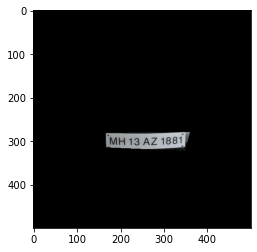

In [8]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [9]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

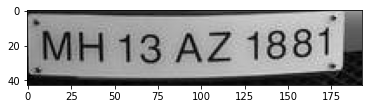

In [10]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [11]:
import easyocr

In [12]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[2, 4], [182, 4], [182, 36], [2, 36]],
  "'MH 13 AZ 1881",
  0.46477693991226215)]

In [13]:
plate_number = result[0][-2]

In [14]:
plate_number

"'MH 13 AZ 1881"

In [15]:
plate_number = plate_number.replace( ' ', '')

In [16]:
plate_number[6:]

'Z1881'

In [17]:
plate_number = plate_number.replace('.','')

In [18]:
plate_number

"'MH13AZ1881"

In [19]:
type(plate_number)

str

In [20]:
import requests
import xmltodict
import json

In [21]:
def get_vehicle_info(plate_number):
    r = requests.get(
        "http://www.regcheck.org.uk/api/reg.asmx/CheckIndia?RegistrationNumber={0}&username=Team12_20".format(str(plate_number)))
    data = xmltodict.parse(r.content)
    jdata = json.dumps(data)
    df = json.loads(jdata)
    df1 = json.loads(df['Vehicle']['vehicleJson'])
    return df1

In [22]:
get_vehicle_info(plate_number)

{'Description': 'MERCEDES-BENZ MERCEDES BENZ W212E250CDI',
 'RegistrationYear': '2011',
 'CarMake': {'CurrentTextValue': 'MERCEDES-BENZ'},
 'CarModel': {'CurrentTextValue': 'MERCEDES BENZ W212E250CDI'},
 'Variant': 'VINTAGE Diesel 2400.0',
 'EngineSize': {'CurrentTextValue': '2143.0'},
 'MakeDescription': {'CurrentTextValue': 'MERCEDES-BENZ'},
 'ModelDescription': {'CurrentTextValue': 'MERCEDES BENZ W212E250CDI'},
 'NumberOfSeats': {'CurrentTextValue': '5'},
 'VechileIdentificationNumber': 'WDD2120036L015224',
 'EngineNumber': '65192430482198',
 'FuelType': {'CurrentTextValue': 'DIESEL'},
 'RegistrationDate': '12/07/2011',
 'Owner': 'PRIYADARSHAN SHAH',
 'Fitness': '',
 'Insurance': '2021-07-06',
 'PUCC': '2021-08-22',
 'VehicleType': 'MOTOR CAR(LMV)',
 'Location': 'DY.RTO,SOLAPUR',
 'ImageUrl': 'http://www.carregistrationapi.in/image.aspx/@TUVSQ0VERVMtQkVOWiBNRVJDRURFUyBCRU5aIFcyMTJFMjUwQ0RJ'}